# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | itaituba
Processing Record 10 of Set 1 | queenstown
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | port macquarie
Processing Record 13 of Set 1 | pankrushikha
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | san isidro de curuguaty
Processing Record 19 of Set 1 | conceicao da barra
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | geo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,7.87,87,77,1.34,US,1701707711
1,port elizabeth,-33.9180,25.5701,20.17,76,20,8.75,ZA,1701707828
2,codrington,-38.2667,141.9667,12.03,94,86,0.39,AU,1701707829
3,jamestown,42.0970,-79.2353,4.77,88,100,8.75,US,1701707829
4,grytviken,-54.2811,-36.5092,1.80,63,41,6.47,GS,1701707829


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.87,87,77,1.34,US,1701707711
1,port elizabeth,-33.9180,25.5701,20.17,76,20,8.75,ZA,1701707828
2,codrington,-38.2667,141.9667,12.03,94,86,0.39,AU,1701707829
3,jamestown,42.0970,-79.2353,4.77,88,100,8.75,US,1701707829
4,grytviken,-54.2811,-36.5092,1.80,63,41,6.47,GS,1701707829


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

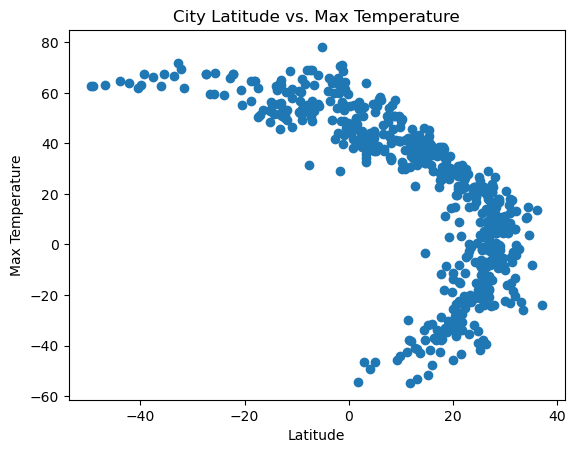

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

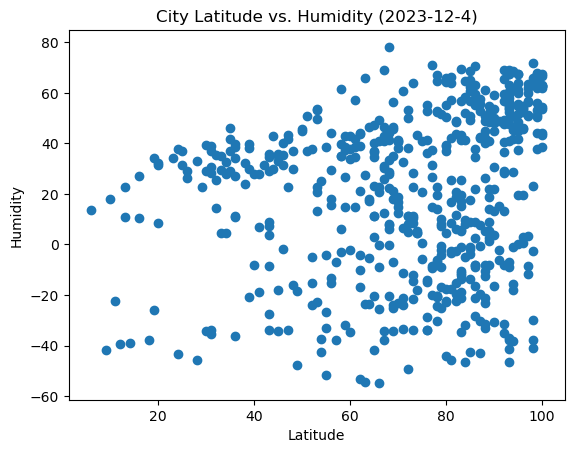

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-12-4)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

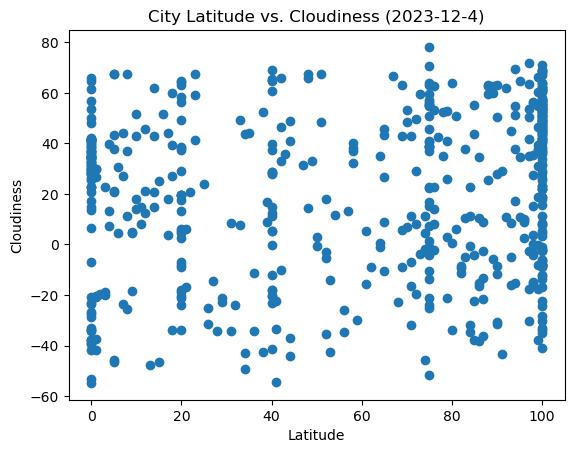

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-12-4)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

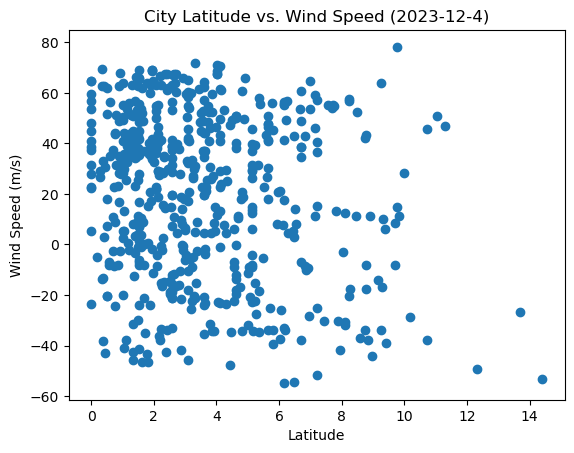

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-12-4)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(r[0])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.87,87,77,1.34,US,1701707711
3,jamestown,42.0970,-79.2353,4.77,88,100,8.75,US,1701707829
11,pankrushikha,53.8319,80.3406,-14.92,90,97,1.59,RU,1701707830
12,yellowknife,62.4560,-114.3525,-13.71,85,100,3.60,CA,1701707821
13,college,64.8569,-147.8028,-18.08,78,40,0.00,US,1701707831


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,20.17,76,20,8.75,ZA,1701707828
2,codrington,-38.2667,141.9667,12.03,94,86,0.39,AU,1701707829
4,grytviken,-54.2811,-36.5092,1.80,63,41,6.47,GS,1701707829
5,port-aux-francais,-49.3500,70.2167,4.07,72,34,12.32,TF,1701707829
6,adamstown,-25.0660,-130.1015,22.35,79,26,5.72,PN,1701707829


###  Temperature vs. Latitude Linear Regression Plot

-0.8670704988415966


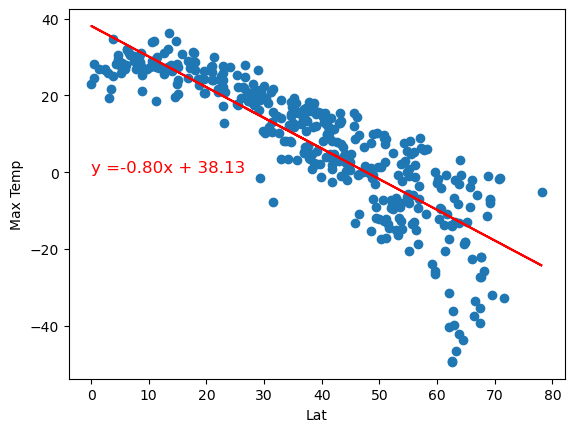

In [27]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0,0))

0.711014187197545


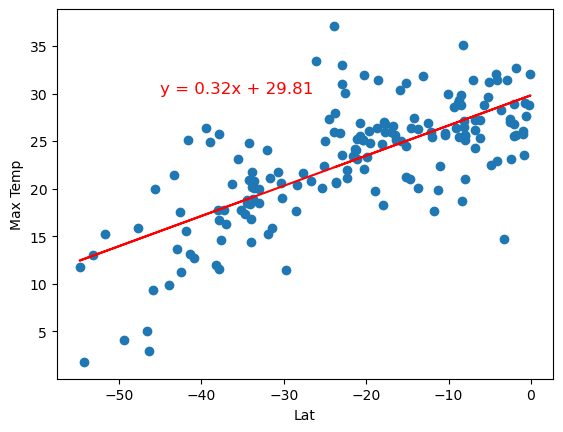

In [33]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-45,30))

**Discussion about the linear relationship:** There is a pretty clear negative correlation in the first graph comparing the max temperature with the northern hemisphere. Conversely, There is a slightly weaker correlation between max temperature and the Latitude of the suthern hemisphere. This would support the assertion that there is a clear connection between how close you are to the equator and how likely you are to have a high max temperature. 

### Humidity vs. Latitude Linear Regression Plot

0.35582615261075407


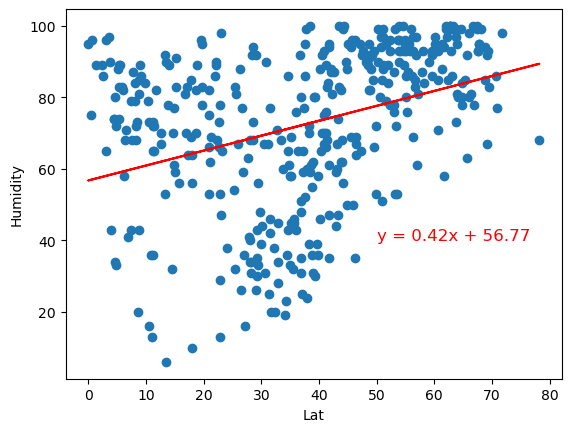

In [36]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,40))

0.2561404416975037


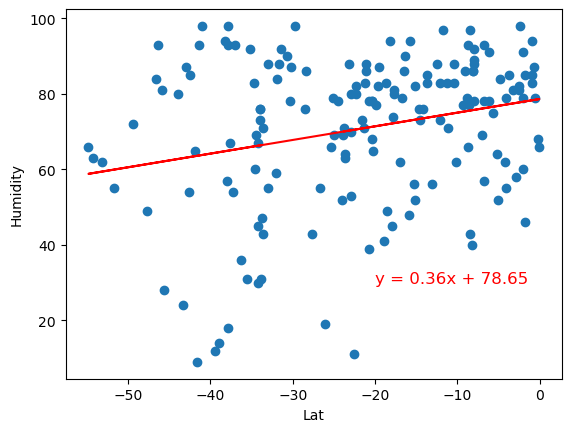

In [38]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-20,30))

**Discussion about the linear relationship:** Based on the output of these two graphs, there doesn't appear to be a very clear relationship or correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

0.2059460685205661


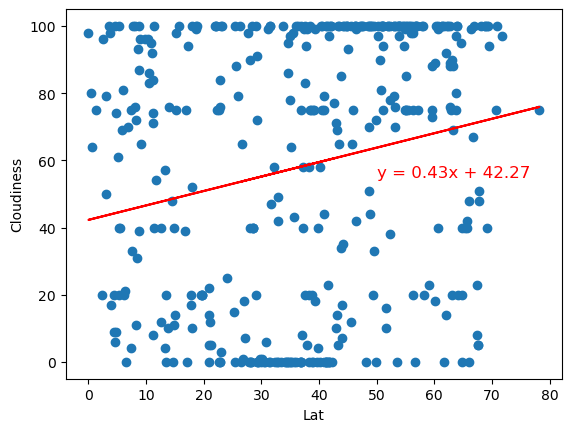

In [42]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (50,55))

0.4264465556018928


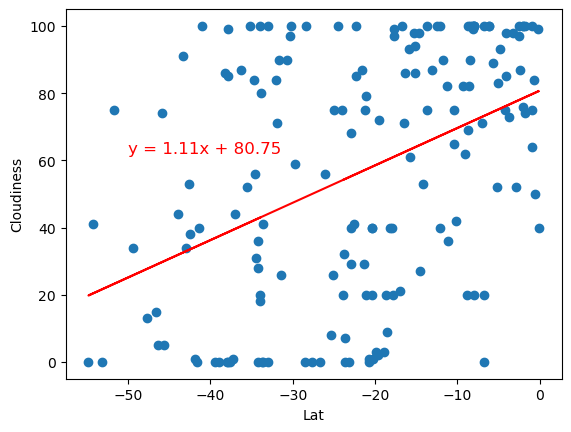

In [46]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50,62))

**Discussion about the linear relationship:** Based on the output of these graphs, there doesn't seem to be a significant correlation between latitude and cloudiness in either hemisphere. While you can make a case that the southern hemisphere has a slightly stronger correlation, I don't think it is enough for there to be a stasitically significant difference

### Wind Speed vs. Latitude Linear Regression Plot

-0.033193266523478655


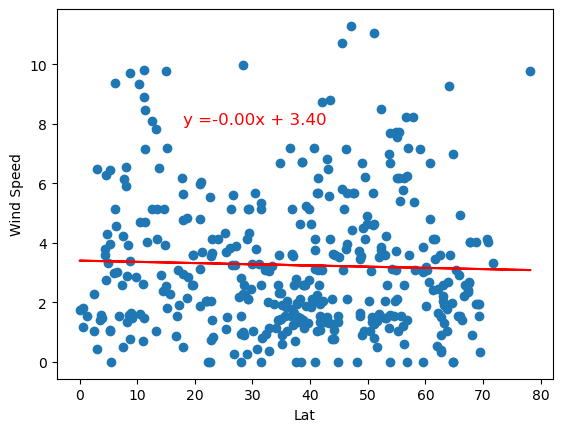

In [51]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (18,8))

-0.27655175953541034


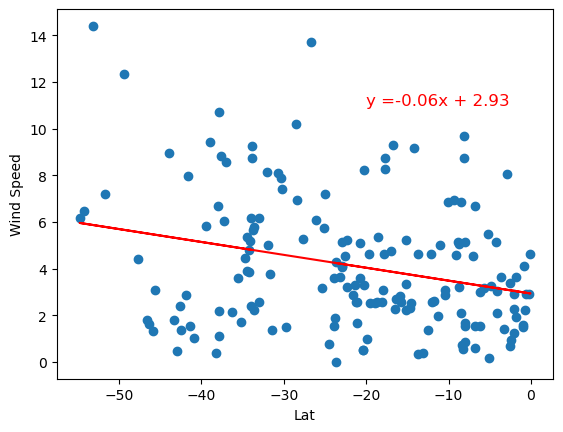

In [56]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-20,11))

**Discussion about the linear relationship:** Once again it appears that there is no significant correlation, this time between between Latitude and Wind Speed. Also again there is a slightly higher correlation in the southern hemisphere, but not enough to be significant in my opinion